# Block Hill example model runs

This notebook configures and runs a collection of Block Hill models: versions of the Grain Hill model that include an embedded layer of blocks, represented as particles that cannot be disturbed upward, but can move downward and laterally upon disturbance, and will fall downward when undermined.

In [1]:
# Imports
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from grainhill import BlockHill
%matplotlib inline

In [2]:
# Function to set up a nicer colormap than the defaults
def get_block_hill_colormap():
    """Create and return a listed colormap."""
    rock = '#5F594D'
    sed = '#A4874B'
    sky = '#D0E4F2'
    mob = '#D98859'
    block = '#660000'
    rock = '#000000'
    clist = [sky, mob, mob, mob, mob, mob, mob, sed, sed, rock, block]
    return mpl.colors.ListedColormap(clist)

In [3]:
# Dictionary for parameters
params = {}

# Parameters
num_cols = 101
params['number_of_node_columns'] = num_cols
num_rows = int(np.round(0.5 * 0.866 * 1.0 * (num_cols - 1)))
params['number_of_node_rows'] = num_rows
params['disturbance_rate'] = 0.01
params['uplift_interval'] = 100.0
params['weathering_rate'] = 0.5e-4
params['run_duration'] = 3000.0
params['show_plots'] = False
params['plot_interval'] = 50.0
params['output_interval'] = 1.1 * params['run_duration']
params['report_interval'] = 20.0
params['settling_rate'] = 220000000.0
params['friction_coef'] = 1.0
params['rock_state_for_uplift'] = 7
params['opt_rock_collapse'] = True
dip_angle = 0.0
params['block_layer_dip_angle'] = 0.0
params['block_layer_thickness'] = 10.0
params['y0_top'] = -(0.866 * num_cols) * np.tan(np.pi * dip_angle / 180.0)
params['cmap'] = get_block_hill_colormap()
params['rock_state_for_uplift'] = 7

In [4]:
# instantiate and run a BlockHill model: first, horizontal
bh = BlockHill((num_rows, num_cols), **params)

# Set lower left and right corners to block. This is for plotting: 
# ensures that the range of vals is always 0--9
bh.grid.at_node['node_state'][0] = 9
bh.grid.at_node['node_state'][num_cols // 2] = 9

# Run the model
bh.run()

Current sim time 0.0(0.0%)


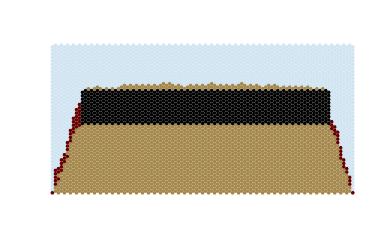

In [5]:
bh.grid.hexplot(bh.grid.at_node['node_state'], color_map=params['cmap'])
plt.axis('equal')
plt.axis('off')
plt.set_cmap(params['cmap'])
plt.savefig('block_layer_flat.pdf', bbox_inches='tight', pad_inches=0, transparent=True)

In [6]:
# Set dip angle to 30 degrees
params['block_layer_dip_angle'] = 30.0
dip_angle = 30.0
params['y0_top'] = -(0.866 * num_cols) * np.tan(np.pi * dip_angle / 180.0)
print(params['y0_top'])
params['run_duration'] = 5000.0

# instantiate and run a BlockHill model: first, horizontal
bh = BlockHill((num_rows, num_cols), **params)

# Set lower left and right corners to block. This is for plotting: 
# ensures that the range of vals is always 0--9
bh.grid.at_node['node_state'][0] = 9
bh.grid.at_node['node_state'][num_cols // 2] = 9

# Run the model
bh.run()

-50.49851864493979
Current sim time 0.0(0.0%)
Current sim time 3400.0(68.0%)
Current sim time 4700.0(94.0%)


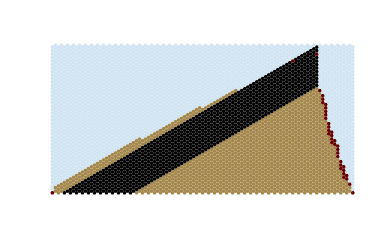

In [7]:
bh.grid.hexplot(bh.grid.at_node['node_state'], color_map=params['cmap'])
plt.axis('equal')
plt.axis('off')
plt.set_cmap(params['cmap'])
plt.savefig('block_layer_30deg.pdf', bbox_inches='tight', pad_inches=0, transparent=True)

In [ ]:
# Set dip angle to 60 degrees
params['block_layer_dip_angle'] = 60.0
dip_angle = 60.0
params['y0_top'] = -(0.866 * num_cols) * np.tan(np.pi * dip_angle / 180.0)
print(params['y0_top'])
params['run_duration'] = 7000.0

# instantiate and run a BlockHill model: first, horizontal
bh = BlockHill((num_rows, num_cols), **params)

# Set lower left and right corners to block. This is for plotting: 
# ensures that the range of vals is always 0--9
bh.grid.at_node['node_state'][0] = 9
bh.grid.at_node['node_state'][num_cols // 2] = 9

# Run the model
bh.run()

-151.49555593481935
Current sim time 0.0(0.0%)
Current sim time 3300.0(47.1428571429%)
Current sim time 4600.0(65.7142857143%)
Current sim time 5700.0(81.4285714286%)


In [ ]:
bh.grid.hexplot(bh.grid.at_node['node_state'], color_map=params['cmap'])
plt.axis('equal')
plt.axis('off')
plt.set_cmap(params['cmap'])
plt.savefig('block_layer_60deg.pdf', bbox_inches='tight', pad_inches=0, transparent=True)

In [ ]:
# Set dip angle to 90 degrees
params['block_layer_dip_angle'] = 90.0
dip_angle = 90.0
params['layer_left_x'] = (0.866 * num_cols - params['block_layer_thickness']) / 2.0
params['run_duration'] = 3800.0

# instantiate and run a BlockHill model: first, horizontal
bh = BlockHill((num_rows, num_cols), **params)

# Set lower left and right corners to block. This is for plotting: 
# ensures that the range of vals is always 0--9
bh.grid.at_node['node_state'][0] = 9
bh.grid.at_node['node_state'][num_cols // 2] = 9

# Run the model
bh.run()

In [ ]:
bh.grid.hexplot(bh.grid.at_node['node_state'], color_map=params['cmap'])
plt.axis('equal')
plt.axis('off')
plt.set_cmap(params['cmap'])
plt.savefig('block_layer_vertical.pdf', bbox_inches='tight', pad_inches=0, transparent=True)